### Part A ###

In [19]:
import pandas as pd

In [20]:
airlines = pd.read_csv('airlines.csv')
print(airlines)

    Unnamed: 0 carrier                         name
0            1      9E            Endeavor Air Inc.
1            2      AA       American Airlines Inc.
2            3      AS         Alaska Airlines Inc.
3            4      B6              JetBlue Airways
4            5      DL         Delta Air Lines Inc.
5            6      EV     ExpressJet Airlines Inc.
6            7      F9       Frontier Airlines Inc.
7            8      FL  AirTran Airways Corporation
8            9      HA       Hawaiian Airlines Inc.
9           10      MQ                    Envoy Air
10          11      OO        SkyWest Airlines Inc.
11          12      UA        United Air Lines Inc.
12          13      US              US Airways Inc.
13          14      VX               Virgin America
14          15      WN       Southwest Airlines Co.
15          16      YV           Mesa Airlines Inc.


In [21]:
del airlines['Unnamed: 0']

In [22]:
airlines.columns

Index(['carrier', 'name'], dtype='object')

In [23]:
airports = pd.read_csv('airports.csv')
print(airports)

      Unnamed: 0  faa                                  name        lat  \
0              1  04G                     Lansdowne Airport  41.130472   
1              2  06A         Moton Field Municipal Airport  32.460572   
2              3  06C                   Schaumburg Regional  41.989341   
3              4  06N                       Randall Airport  41.431912   
4              5  09J                 Jekyll Island Airport  31.074472   
5              6  0A9        Elizabethton Municipal Airport  36.371222   
6              7  0G6               Williams County Airport  41.467306   
7              8  0G7         Finger Lakes Regional Airport  42.883565   
8              9  0P2          Shoestring Aviation Airfield  39.794824   
9             10  0S9                 Jefferson County Intl  48.053809   
10            11  0W3                Harford County Airport  39.566838   
11            12  10C                    Galt Field Airport  42.402889   
12            13  17G  Port Bucyrus-Cr

In [24]:
del airports['Unnamed: 0']

In [25]:
airports.columns

Index(['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone'], dtype='object')

In [26]:
flights = pd.read_csv('flights.csv')
flights.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour',
       'minute', 'time_hour'],
      dtype='object')

In [27]:
del flights['Unnamed: 0']
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [28]:
planes = pd.read_csv('planes.csv')
planes.columns

Index(['Unnamed: 0', 'tailnum', 'year', 'type', 'manufacturer', 'model',
       'engines', 'seats', 'speed', 'engine'],
      dtype='object')

In [12]:
del planes['Unnamed: 0']
planes.columns

Index(['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats',
       'speed', 'engine'],
      dtype='object')

In [29]:
weather = pd.read_csv('weather.csv')
weather.columns

Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib', 'time_hour'],
      dtype='object')

In [30]:
del weather['Unnamed: 0']
weather.columns

Index(['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour'],
      dtype='object')

All of the code above is to load data and process uncessary columns.

Problem i.

In [31]:
len(airlines)

16

In [32]:
len(airports)

1458

In [33]:
len(flights)

336776

In [34]:
len(planes)

3322

In [35]:
len(weather)

26130

Problem ii.

In [36]:
flights['dest'].value_counts().head(5)

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64

It indicates that the top five busiest airports are ORD, ATL, LAX, BOS and MCO.

In [16]:
month_day = {1:0,2:31,3:28,4:31,5:30,6:31,7:30,8:31,9:31,10:30,11:31,12:30}

In [17]:
cum_monthday={}
sum = 0
for i in range(1,13):
    sum = sum + month_day[i]
    cum_monthday[i]=sum

In [82]:
cumtime=[]
for i in range(len(flights)):
    day = flights.day[i]-1
    if flights.arr_time[i] < flights.dep_time[i]:
        day = day + 1
    hour = round(flights.arr_time[i]/100)
    minute = flights.arr_time[i]%100
    cumtime.append(cum_monthday[flights.month[i]]*24*60 + day*24*60 +hour*60 + minute)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [86]:
val = pd.Series(cumtime,index = [a for a in range(len(flights))])

In [87]:
flights['arr_cumtime'] = val

In [92]:
import numpy as np


def flight_msd(airportname):
    data = flights[flights['dest'] == airportname]['arr_cumtime']
    ddiff = data.sort_values().diff().dropna().apply(abs)
    avg = np.mean(ddiff)
    sd = np.std(ddiff)
    return round(avg,2),round(sd,2)

In [93]:
flight_msd('ORD')

(31.62, 72.68)

In [94]:
flight_msd('ATL')

(31.12, 73.34)

In [95]:
flight_msd('LAX')

(32.7, 69.31)

In [96]:
flight_msd('BOS')

(34.95, 66.47)

In [97]:
flight_msd('MCO')

(37.57, 72.64)

Problem iii.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def flight_plot(airportname):
    data = flights[flights['dest'] == airportname]['arr_cumtime']
    ddiff = data.sort_values().diff().dropna().apply(abs)
    kde = stats.gaussian_kde(ddiff)
    xs=np.linspace(0,1200,200)
    kde.covariance_factor = lambda : .25
    kde._compute_covariance()
    plt.clf
    fig=plt.figure()
    ax1=fig.add_subplot(2,1,1)
    ax1.set_title('Histogram')
    ax2=fig.add_subplot(2,1,2)
    ax2.set_title('Density Plot')
    ax1.hist(ddiff,bins=100,alpha=0.3)
    ax2.plot(xs, kde(xs))
    plt.show()


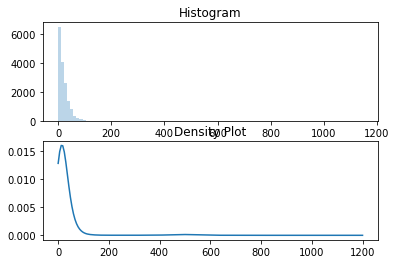

In [105]:
flight_plot('ORD')

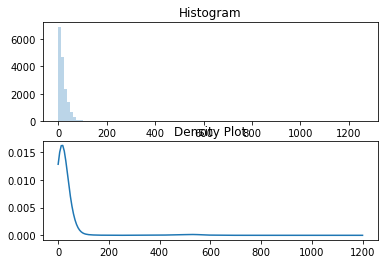

In [106]:
flight_plot('ATL')

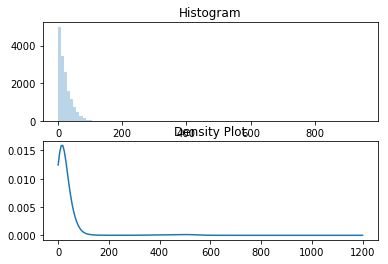

In [107]:
flight_plot('LAX')

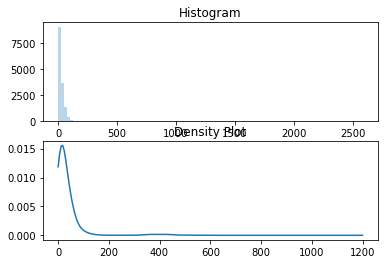

In [108]:
flight_plot('BOS')

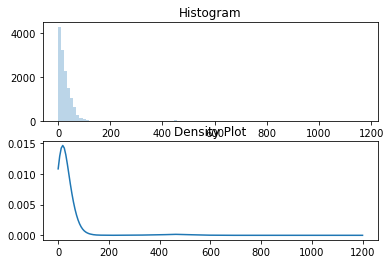

In [109]:
flight_plot('MCO')